# DATA CLEANING & PREPROCESSING

## 1. Data and libraries importing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("appoinment_noshow.csv")

In [3]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


## 2. Data preprocessing and cleaning

### 2a.Column headers name changing to appropriate preferred type

In [4]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [5]:
df.columns=["patient_id","appoinment_id","gender","schedule_date","appoinment_date","age","appoinment_place","scholarship",
            "hyper_tension","diabetes","alcoholic","handicapped","sms_received","no_show"]

In [6]:
df.columns

Index(['patient_id', 'appoinment_id', 'gender', 'schedule_date',
       'appoinment_date', 'age', 'appoinment_place', 'scholarship',
       'hyper_tension', 'diabetes', 'alcoholic', 'handicapped', 'sms_received',
       'no_show'],
      dtype='object')

In [7]:
df.head(3)

,patient_id,appoinment_id,gender,schedule_date,appoinment_date,age,appoinment_place,scholarship,hyper_tension,diabetes,alcoholic,handicapped,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


### 2b.Finding null values and duplicates

In [8]:
df.isnull().sum()

patient_id          0
appoinment_id       0
gender              0
schedule_date       0
appoinment_date     0
age                 0
appoinment_place    0
scholarship         0
hyper_tension       0
diabetes            0
alcoholic           0
handicapped         0
sms_received        0
no_show             0
dtype: int64

In [9]:
df.duplicated().sum()

0

* There is no null values or duplicated records in the dataset

### 2c. Data type changing

In [10]:
df.dtypes

patient_id          float64
appoinment_id         int64
gender               object
schedule_date        object
appoinment_date      object
age                   int64
appoinment_place     object
scholarship           int64
hyper_tension         int64
diabetes              int64
alcoholic             int64
handicapped           int64
sms_received          int64
no_show              object
dtype: object

* Here schedule_date and appoinment_date is in string utc datetime format. We need to change it to normal date time format

In [11]:
df.schedule_date

0         2016-04-29T18:38:08Z
1         2016-04-29T16:08:27Z
2         2016-04-29T16:19:04Z
3         2016-04-29T17:29:31Z
4         2016-04-29T16:07:23Z
                  ...         
110522    2016-05-03T09:15:35Z
110523    2016-05-03T07:27:33Z
110524    2016-04-27T16:03:52Z
110525    2016-04-27T15:09:23Z
110526    2016-04-27T13:30:56Z
Name: schedule_date, Length: 110527, dtype: object

In [12]:
df.schedule_date=pd.to_datetime(df.schedule_date,format="ISO8601").dt.strftime("%d-%m-%Y")

In [13]:
df.schedule_date=pd.to_datetime(df.schedule_date,dayfirst=True)

In [14]:
df.schedule_date

0        2016-04-29
1        2016-04-29
2        2016-04-29
3        2016-04-29
4        2016-04-29
            ...    
110522   2016-05-03
110523   2016-05-03
110524   2016-04-27
110525   2016-04-27
110526   2016-04-27
Name: schedule_date, Length: 110527, dtype: datetime64[ns]

In [15]:
df.appoinment_date

0         2016-04-29T00:00:00Z
1         2016-04-29T00:00:00Z
2         2016-04-29T00:00:00Z
3         2016-04-29T00:00:00Z
4         2016-04-29T00:00:00Z
                  ...         
110522    2016-06-07T00:00:00Z
110523    2016-06-07T00:00:00Z
110524    2016-06-07T00:00:00Z
110525    2016-06-07T00:00:00Z
110526    2016-06-07T00:00:00Z
Name: appoinment_date, Length: 110527, dtype: object

In [16]:
df.appoinment_date=pd.to_datetime(df.appoinment_date,format="ISO8601").dt.strftime("%d-%m-%Y")

In [17]:
df.appoinment_date=pd.to_datetime(df.appoinment_date,dayfirst=True)

In [18]:
df.appoinment_date

0        2016-04-29
1        2016-04-29
2        2016-04-29
3        2016-04-29
4        2016-04-29
            ...    
110522   2016-06-07
110523   2016-06-07
110524   2016-06-07
110525   2016-06-07
110526   2016-06-07
Name: appoinment_date, Length: 110527, dtype: datetime64[ns]

In [19]:
df.dtypes

patient_id                 float64
appoinment_id                int64
gender                      object
schedule_date       datetime64[ns]
appoinment_date     datetime64[ns]
age                          int64
appoinment_place            object
scholarship                  int64
hyper_tension                int64
diabetes                     int64
alcoholic                    int64
handicapped                  int64
sms_received                 int64
no_show                     object
dtype: object

* Now the data types of all the columns are changed to appropriate format

### 2d. Column analysing, outlier detection and cleaning

In [20]:
df.gender.value_counts()

gender
F    71840
M    38687
Name: count, dtype: int64

* Let's standardize and encode gender category

In [21]:
df=df.replace({'gender':{"F":1,"M":0}})

In [22]:
df.gender.value_counts()

gender
1    71840
0    38687
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='Density'>

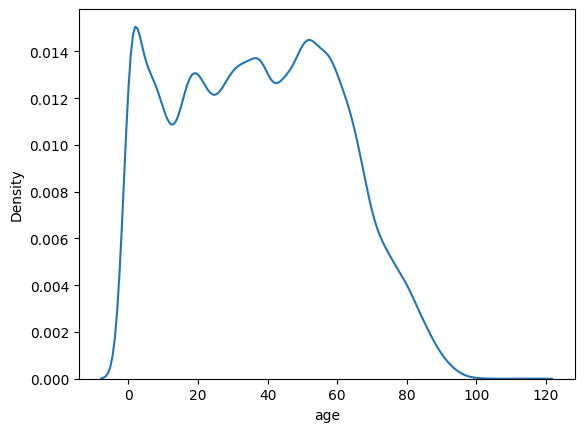

In [23]:
sns.kdeplot(df.age)

In [24]:
df[(df["age"]<0) | (df["age"]>100)]

,patient_id,appoinment_id,gender,schedule_date,appoinment_date,age,appoinment_place,scholarship,hyper_tension,diabetes,alcoholic,handicapped,sms_received,no_show
58014,9.762948e+14,5651757,1,2016-05-03,2016-05-03,102,CONQUISTA,0,0,0,0,0,0,No
63912,3.196321e+13,5700278,1,2016-05-16,2016-05-19,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,1,2016-05-16,2016-05-19,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,1,2016-04-08,2016-05-16,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,1,2016-05-30,2016-05-30,115,ANDORINHAS,0,0,0,0,1,0,No
90372,2.342836e+11,5751563,1,2016-05-31,2016-06-02,102,MARIA ORTIZ,0,0,0,0,0,0,No
97666,7.482346e+14,5717451,1,2016-05-19,2016-06-03,115,SÃO JOSÉ,0,1,0,0,0,1,No
99832,4.659432e+14,5775010,1,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


* 0 age shows the infant babies
* -1 in the age column is a wrong record
* age>100 could be outliers
* Lets replace these values in a way, if any age less than 0 replace to 0 and any age greater than 100 replaced to 100

In [25]:
df.age=np.select([df.age>100,df.age<0],[100,0],df.age)

In [26]:
df[(df["age"]<0) | (df["age"]>100)]

,patient_id,appoinment_id,gender,schedule_date,appoinment_date,age,appoinment_place,scholarship,hyper_tension,diabetes,alcoholic,handicapped,sms_received,no_show


<Axes: >

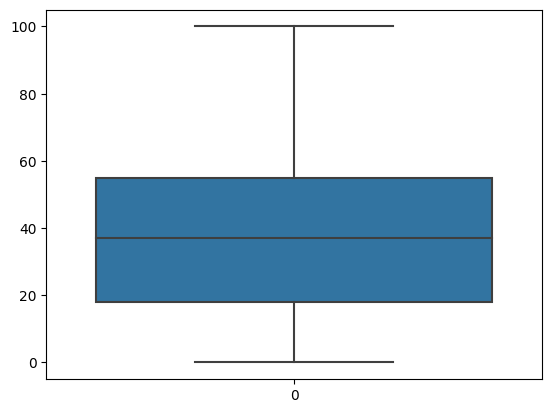

In [27]:
sns.boxplot(df.age)

In [28]:
df.appoinment_place.value_counts()

appoinment_place
JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: count, Length: 81, dtype: int64

In [29]:
df.scholarship.value_counts()

scholarship
0    99666
1    10861
Name: count, dtype: int64

In [30]:
df.hyper_tension.value_counts()

hyper_tension
0    88726
1    21801
Name: count, dtype: int64

In [31]:
df.diabetes.value_counts()

diabetes
0    102584
1      7943
Name: count, dtype: int64

In [32]:
df.alcoholic.value_counts()

alcoholic
0    107167
1      3360
Name: count, dtype: int64

In [33]:
df.handicapped.value_counts()

handicapped
0    108286
1      2042
2       183
3        13
4         3
Name: count, dtype: int64

* This data should be either true(1) or false(0). So lets relace the values 2,3,4 with the mode value 0

In [34]:
df.handicapped=df.handicapped.replace([2,3,4],0)

In [35]:
df.handicapped.value_counts()

handicapped
0    108485
1      2042
Name: count, dtype: int64

In [36]:
df.sms_received.value_counts()

sms_received
0    75045
1    35482
Name: count, dtype: int64

In [37]:
df.no_show.value_counts()

no_show
No     88208
Yes    22319
Name: count, dtype: int64

In [38]:
df=df.replace({'no_show':{"No":0,"Yes":1}})

In [39]:
df.no_show.value_counts()

no_show
0    88208
1    22319
Name: count, dtype: int64

In [40]:
df.duplicated().sum()

0

In [41]:
df

,patient_id,appoinment_id,gender,schedule_date,appoinment_date,age,appoinment_place,scholarship,hyper_tension,diabetes,alcoholic,handicapped,sms_received,no_show
0,2.987250e+13,5642903,1,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,0,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,1,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,1,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,1,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,1,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,0
110523,3.596266e+12,5650093,1,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,0
110524,1.557663e+13,5630692,1,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,0
110525,9.213493e+13,5630323,1,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,0


In [42]:
df.dtypes

patient_id                 float64
appoinment_id                int64
gender                       int64
schedule_date       datetime64[ns]
appoinment_date     datetime64[ns]
age                          int64
appoinment_place            object
scholarship                  int64
hyper_tension                int64
diabetes                     int64
alcoholic                    int64
handicapped                  int64
sms_received                 int64
no_show                      int64
dtype: object